In [2]:
# This notebook analyzes input-output relationships for X, Y, Z axes at different voltage levels.

In [13]:
%pip install -q matplotlib pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

Now read the data. It goes: timestep, x-axis in, x-axis in (scaled), y-axis in, y-axis in (scaled), z-axis in, z-axis in (scaled), x-axis out, y-axis out, z-axis out

In [28]:
df = pd.read_csv("6V_all-axis_fast.txt", sep=r"\s+", header=None)

df.columns = [
    "timestep",
    "x_in", "x_in_scaled",
    "y_in", "y_in_scaled",
    "z_in", "z_in_scaled",
    "x_out", "y_out", "z_out"
]
file_format = df.columns

print(df.head(10))
print("Shape:", df.shape)

     timestep        x_in  x_in_scaled        y_in  y_in_scaled       z_in  \
0  4226439499    0.000000            0    0.000000            0   0.000000   
1  4226439500  166.909218     10938562  177.002152     11600013  16.229296   
2  4226439501  167.976277     11008493  177.382261     11624923  13.580543   
3  4226439502  169.025740     11077270  177.786055     11651386  10.939399   
4  4226439503  170.057600     11144894  178.213424     11679394   8.306029   
5  4226439504  171.071854     11211365  178.664255     11708940   5.680600   
6  4226439505  172.068498     11276681  179.138427     11740015   3.063275   
7  4226439506  173.047532     11340843  179.635819     11772613   0.454220   
8  4226439507  174.008957     11403850  180.156305     11806723  -2.146402   
9  4226439508  174.952776     11465705  180.699753     11842339  -4.738428   

   z_in_scaled     x_out         y_out       z_out  
0            0  7491.712 -7.662780e+13 -633441.408  
1      1063603  7505.280 -7.662799e

Analyse the relationship between the raw inputs and outputs ...

In [29]:
def plot_raw_inputs():
    # raw inputs vs outputs
    fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

    axs[0].plot(df["timestep"], df["x_in"], label="x_in (V)")
    axs[0].plot(df["timestep"], df["x_out"], label="x_out (nm)")
    axs[0].legend(); axs[0].set_ylabel("X-axis")

    axs[1].plot(df["timestep"], df["y_in"], label="y_in (V)")
    axs[1].plot(df["timestep"], df["y_out"], label="y_out (nm)")
    axs[1].legend(); axs[1].set_ylabel("Y-axis")

    axs[2].plot(df["timestep"], df["z_in"], label="z_in (V)")
    axs[2].plot(df["timestep"], df["z_out"], label="z_out (nm)")
    axs[2].legend(); axs[2].set_ylabel("Z-axis")
    axs[2].set_xlabel("Timestep")

    plt.tight_layout()
    plt.show()


def scatter_plot():
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    axs[0].scatter(df["x_in"], df["x_out"], s=1, alpha=0.5)
    axs[0].set_xlabel("x_in (V)")
    axs[0].set_ylabel("x_out (nm)")
    axs[0].set_title("X-axis response")

    axs[1].scatter(df["y_in"], df["y_out"], s=1, alpha=0.5, c="orange")
    axs[1].set_xlabel("y_in (V)")
    axs[1].set_ylabel("y_out (nm)")
    axs[1].set_title("Y-axis response")

    axs[2].scatter(df["z_in"], df["z_out"], s=1, alpha=0.5, c="green")
    axs[2].set_xlabel("z_in (V)")
    axs[2].set_ylabel("z_out (nm)")
    axs[2].set_title("Z-axis response")

    plt.tight_layout()
    plt.show()

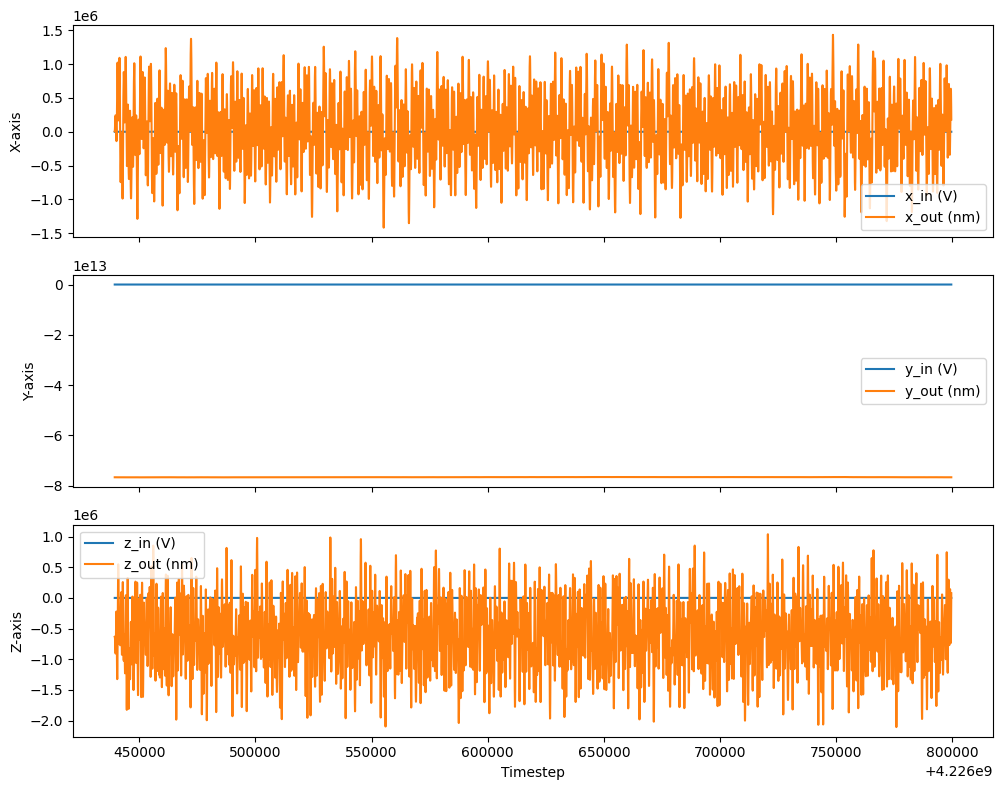

In [30]:
plot_raw_inputs()

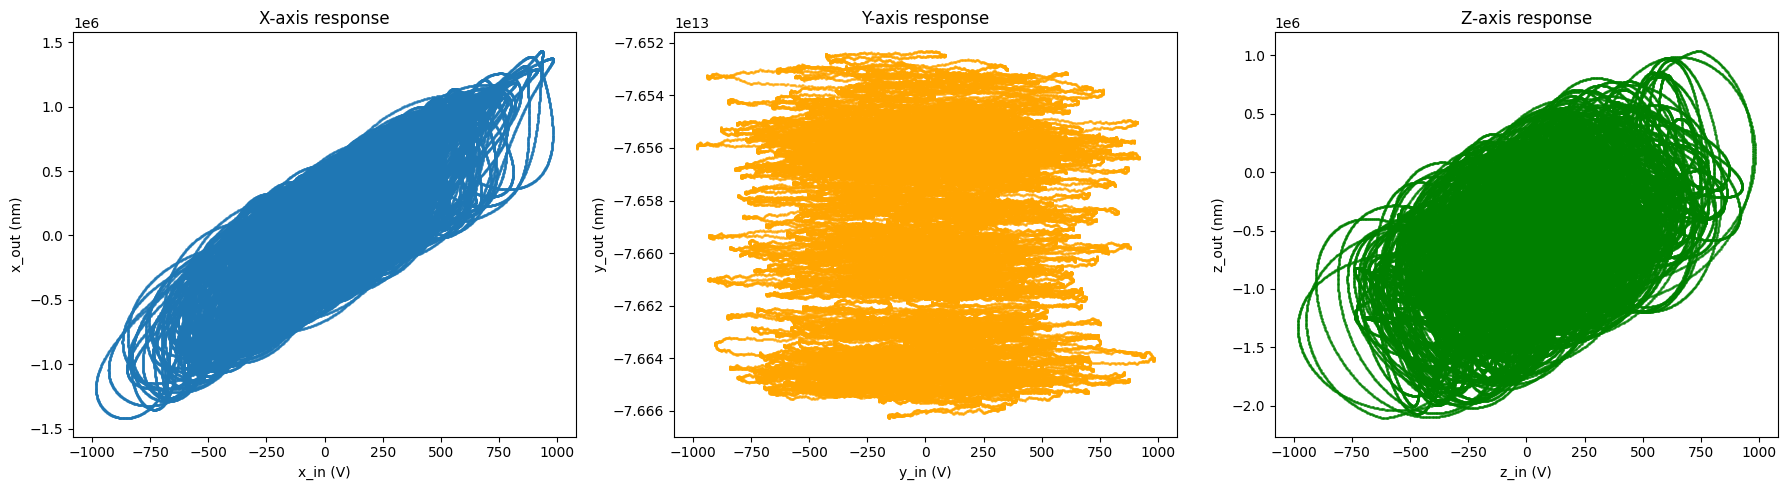

In [31]:
scatter_plot()

Looks like Y axis out (nm) is essentially flat around -7.65e13 - a neg offset.
Unlike x & z axes, there is no dependence on y axis in

In [23]:
# Now do the comparison against different voltages (1.5, 3, 6) - all fast scans

In [38]:
# load all the files
def load_file(path, label):
    df = pd.read_csv(path, sep=r"\s+", header=None)
    df.columns = file_format
    df["voltage_level"] = label # add this as an extra metadata
    return df

df_6V = load_file("6V_all-axis_fast.txt", 6.0)
df_3V = load_file("3V_all-axis_fast.txt", 3.0)
df_1p5V = load_file("1_5V_all-axis_fast.txt", 1.5)

df_all = pd.concat([df_6V, df_3V, df_1p5V], ignore_index=True)
df_all.head(7)
df_all.head(-7)

,timestep,x_in,x_in_scaled,y_in,y_in_scaled,z_in,z_in_scaled,x_out,y_out,z_out,voltage_level
0,4226439499,0.000000,0,0.000000,0,0.000000,0,7491.712,-7.662780e+13,-633441.408,6.0
1,4226439500,166.909218,10938562,177.002152,11600013,16.229296,1063603,7505.280,-7.662799e+13,-633447.552,6.0
2,4226439501,167.976277,11008493,177.382261,11624923,13.580543,890014,7530.240,-7.662779e+13,-633458.944,6.0
3,4226439502,169.025740,11077270,177.786055,11651386,10.939399,716924,7540.352,-7.662803e+13,-633462.016,6.0
4,4226439503,170.057600,11144894,178.213424,11679394,8.306029,544343,7563.904,-7.662829e+13,-633471.360,6.0
...,...,...,...,...,...,...,...,...,...,...,...
1079991,4260427821,-80.785007,-5294326,-38.572453,-2527884,-6.497701,-425833,-157408.128,-7.752860e+13,-773263.744,1.5
1079992,4260427822,-80.667745,-5286641,-38.703243,-2536455,-7.460000,-488898,-157474.048,-7.752876e+13,-773133.952,1.5
1079993,4260427823,-80.548777,-5278844,-38.825277,-2544453,-8.431130,-552542,-157537.536,-7.752885e+13,-772999.296,1.5
1079994,4260427824,-80.428110,-5270936,-38.938526,-2551875,-9.411007,-616759,-157655.296,-7.752869e+13,-772730.624,1.5


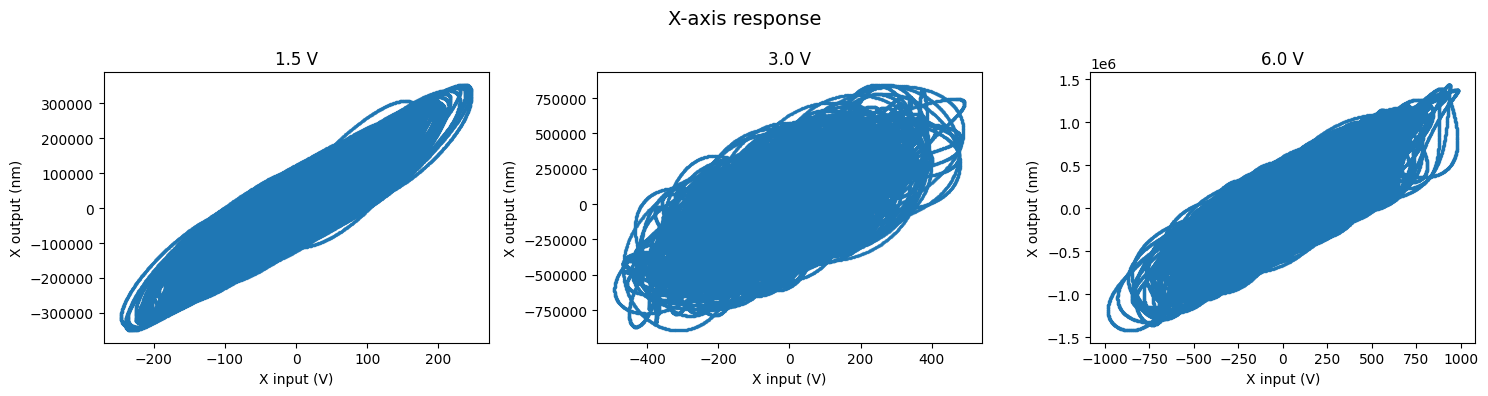

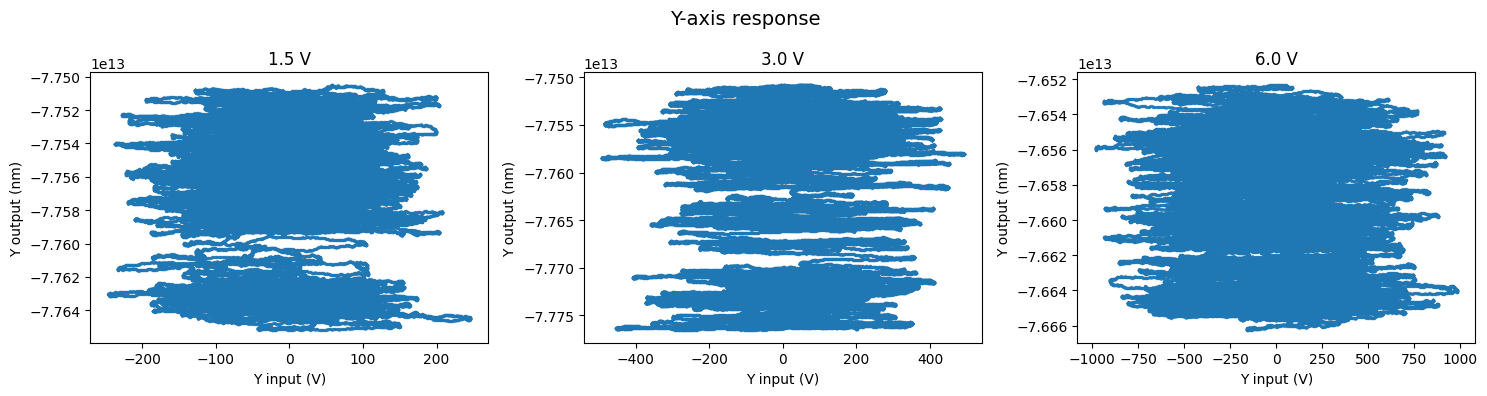

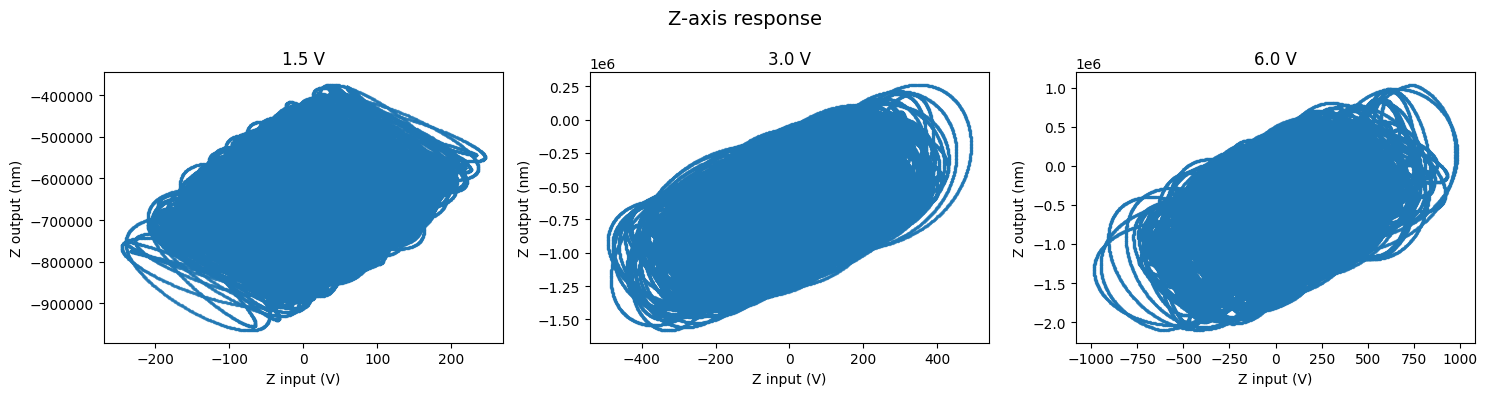

In [42]:
axes = ["x", "y", "z"]

for axis in axes:
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    for ax, v in zip(axs, [1.5, 3.0, 6.0]):
        subset = df_all[df_all["voltage_level"] == v]
        ax.scatter(subset[f"{axis}_in"], subset[f"{axis}_out"], s=2, alpha=0.5)
        ax.set_title(f"{v} V")
        ax.set_xlabel(f"{axis.upper()} input (V)")
        ax.set_ylabel(f"{axis.upper()} output (nm)")
    fig.suptitle(f"{axis.upper()}-axis response", fontsize=14)
    plt.tight_layout()
    plt.show()